In [21]:
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np

In [175]:
# Uploaded the image to Google Drive Folder and Using the Path to Access the Image

img= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Robotics - R504D101-3002/DSC_0685.JPG")

# cv2_imshow(img1)

In [36]:
# Crop the image to get the desired place
# First checking with Helper Lines

# Getting Height and Width of The Image
height, width, layers = img.shape
print(img.shape)

(1080, 1142, 3)


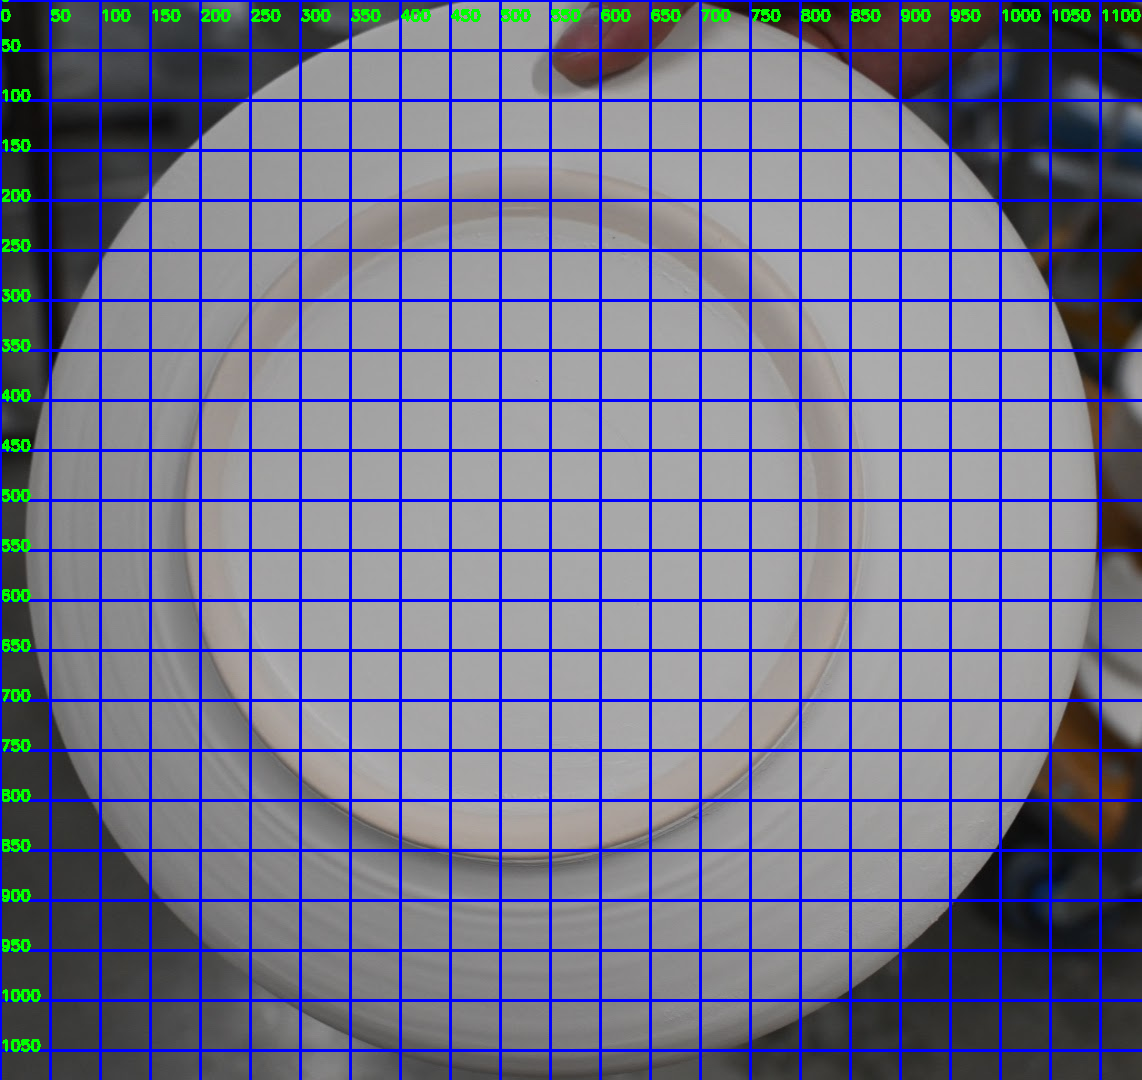

In [51]:
# Helper Lines

imgCopy = img


# First generating Some Random Horizontal Lines
for x in range(0, height,50):
  cv2.line(imgCopy, (0,x), (width, x), (255,0,0), 2)
  cv2.putText(imgCopy, f"{x}", (0,x),cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,255,0), 2)

# Generating some Random Vertical Lines
for x in range(0, width, 50):
  cv2.line(imgCopy, (x, 0), (x, height), (255,0,0), 2)
  cv2.putText(imgCopy, f"{x}", (x,20),cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,255,0), 2)

cv2_imshow(imgCopy)

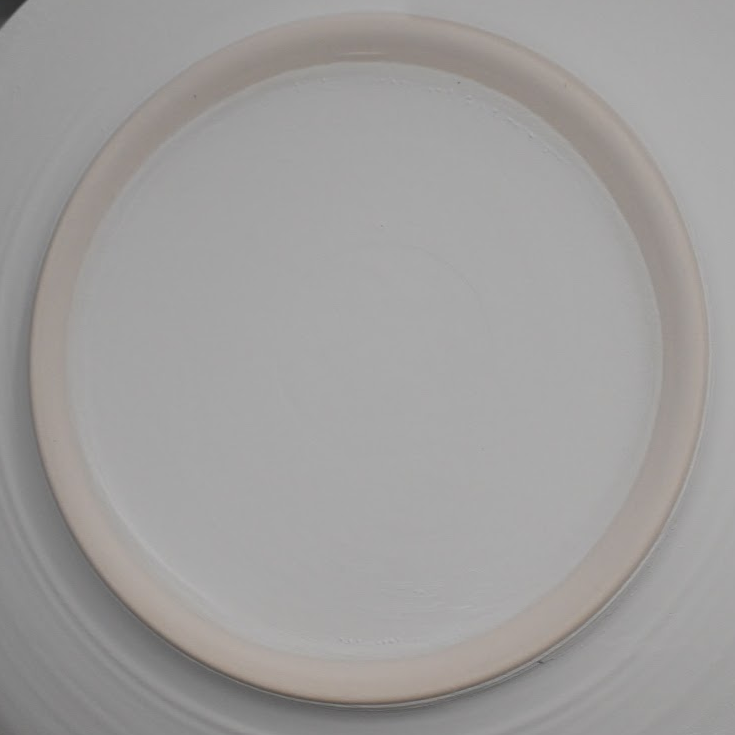

In [176]:
# Cropping image on basis of the helper lines

imgCrop = img

imgCrop = imgCrop[155:890, 155:890]

cv2_imshow(imgCrop)


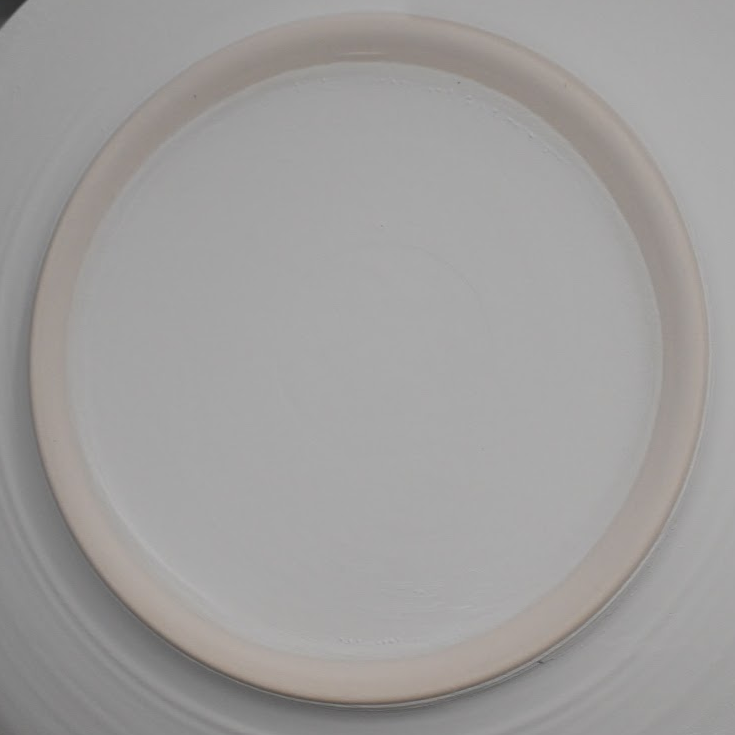

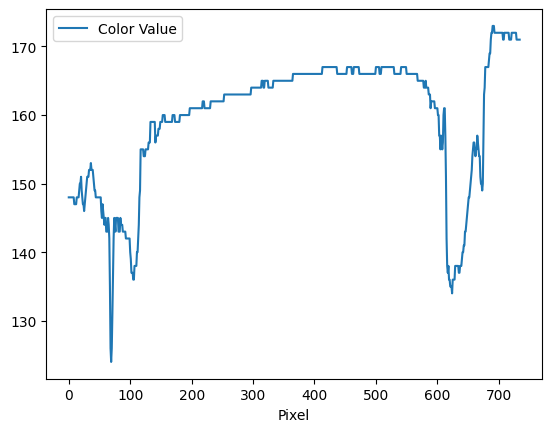

In [122]:
# Taking the Color Value of Unglazed Area.

colorArray= []

height, width, layers = imgCrop.shape

for pixels in range(0, width):
  # Taking 200 here as from previous helper lines, unglazed area is seen here
  colorValue = imgCrop[200, pixels]
  row = [pixels, colorValue[0]]
  colorArray.append(row)

colordf = pd.DataFrame(colorArray, columns=["Pixel", "Color Value"])
colordf.plot(x="Pixel")
cv2_imshow(imgCrop)

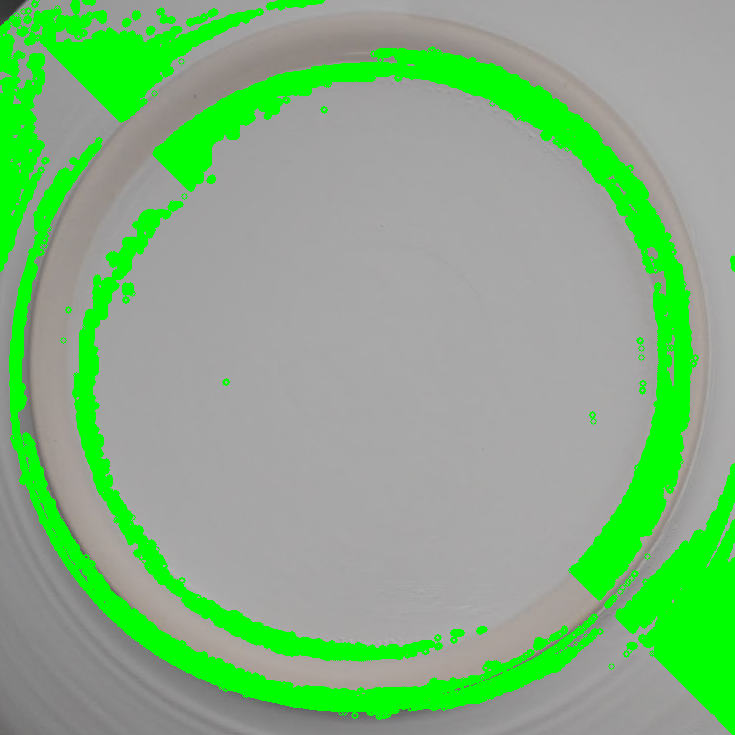

In [170]:
# Detect unglazed area and mark with green circles
for x in range(0, width):
  for y in range(0, height):
    colorValue = imgCrop[y, x]
    if 150 < colorValue[0] < 160:
      cv2.circle(imgCrop, (y, x), 3, (0, 255, 0), 1)

cv2_imshow(imgCrop)


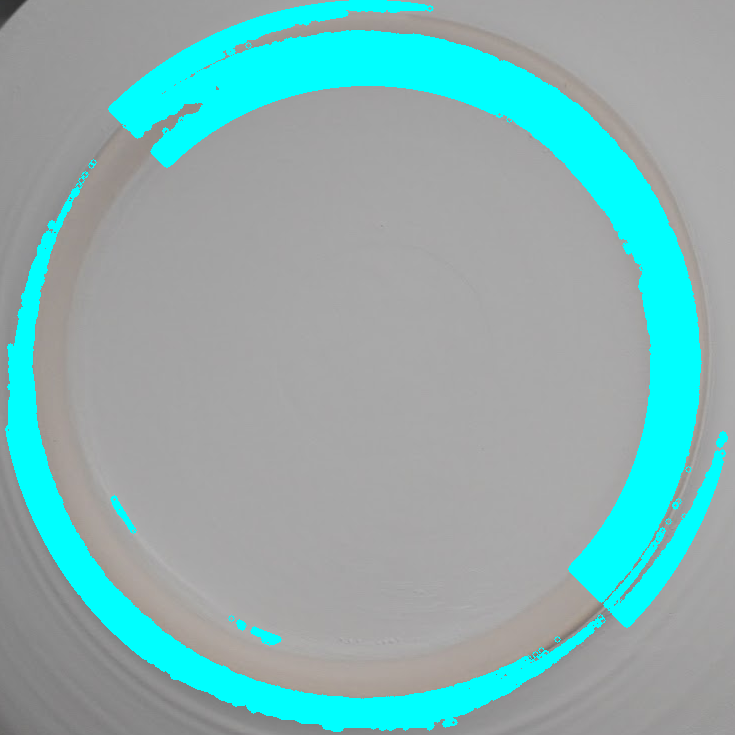

In [177]:
# Almost getting there but the issue it's not sill correct circle.
# Add some conditions there for making it a whole circle.

centerX= width/2
centerY= height/2
# calculating from initial_helper lines
radius= (850-200)/2
stroke= 40

for x in range(0, width):
  for y in range(0, height):
    colorValue = imgCrop[y, x]
    if 140 < colorValue[0] < 170:
      distance = np.sqrt((x - centerX) ** 2 + (y - centerY) ** 2)
      if abs(distance - radius) < stroke:
        cv2.circle(imgCrop, (y, x), 3, (255, 255, 0), 1)

cv2_imshow(imgCrop)